In [1]:
%matplotlib inline
from inc.notebook004 import *

# Predicting when data does not fit the memory

In [2]:
predict_memory()

Results for profiling set: 810 cases fit in the memory, 10 do not, 0 prediction errors.
Results for target set: 300 cases fit in the memory, 40 do not, 0 prediction errors.


# Data summary

In [3]:
get_summary()

mean (sec)  available  outliers  \
application set       input       workers                                    
hbkmeans    profiling 32000       1             18.97         10         0   
                                  2             17.72          8         2   
                                  3             17.32          8         2   
                                  4             18.88         10         0   
                                  5             19.90          9         1   
                                  6             20.97         10         0   
                                  7             21.90         10         0   
                                  8             23.26          9         1   
                      64000       1             19.08         10         0   
                                  2             18.60         10         0   
                                  3             17.92         10         0   
                                  4             19.13         10         0   
                                  5             20.41         10         0   
                                  6             21.32         10         0   
                                  7             21.78         10         0   
                                  8             22.56         10         0   
                      128000      1             20.51         10         0   
                                  2             19.37         10         0   
                                  3             18.60         10         0   
                                  4             19.71         10         0   
                                  5             21.00         10         0   
                                  6             21.29         10         0   
                                  7             22.50         10         0   
                                  8             22.42         10         0   
                      256000      1             22.83         10         0   
                                  2             21.02         10         0   
                                  3             19.50         10         0   
                                  4             20.57         10         0   
                                  5             21.58         10         0   
                                  6             22.76          8         2   
                                  7             23.64         10         0   
                                  8             24.39         10         0   
                      512000      1             27.80         10         0   
                                  2             24.19         10         0   
                                  3             21.51         10         0   
                                  4             22.68         10         0   
                                  5             23.90          9         1   
                                  6             24.85         10         0   
                                  7             25.54         10         0   
                                  8             25.99         10         0   
                      1024000     1             36.55         10         0   
                                  2             30.13         10         0   
                                  3             24.90         10         0   
                                  4             26.01         10         0   
                                  5             27.64          9         1   
                                  6             28.37         10         0   
                                  7             28.60         10         0   
                                  8             29.54          9         1   
                      2048000     1             52.56         10         0   
                                  2             40.73         10 

# Tasks and HDFS Blocks

In [4]:
tasks_blocks()

count
Application Size (MB) 1st-Stage Tasks HDFS Blocks       
hbkmeans    6.13      5               1               80
            12.26     5               1               80
            24.51     5               1               80
            49.03     5               1               80
            98.06     5               1               80
            196.11    5               2               80
            392.22    5               4               80
            784.45    10              7               80
            3137.82   25              25              50
            12551.30  100             99              50
hbsort      262.80    2               3               20
            525.60    5               5               30
            1051.18   9               9               40
            2102.38   17              17              30
            3132.80   25              25              50
            31327.82  245             245             40
wikipedia   128.00    2               1               10
            255.99    2               2               10
            511.95    4               4               10
            1024.00   8               8               30
            46294.09  362             362            150

# Stage Tasks

In [5]:
%%time
stage_tasks()

Wikipedia:


,,,count
stg 0,stg 1,stg 2,
2,200,1,20
4,200,1,10
8,200,1,30
362,200,1,150


HBKmeans:


,,,,,,,,,,,,,,,,,,,,,,,,,,count
stg 0,stg 1,stg 2,stg 3,stg 4,stg 5,stg 6,stg 7,stg 8,stg 9,stg 10,stg 11,stg 12,stg 13,stg 14,stg 15,stg 16,stg 17,stg 18,stg 19,stg 20,stg 21,stg 22,stg 23,stg 24,stg 25,
5,5,5,5,5,5,5,5,5,5,5,5,5,5,2,5,2,5,2,5,2,5,2,5,2,5,560
10,10,10,10,10,10,10,10,10,10,10,10,10,10,2,10,2,10,2,10,2,10,2,10,2,10,80
25,25,25,25,25,25,25,25,25,25,25,25,25,25,2,25,2,25,2,25,2,25,2,25,2,25,50
100,100,100,100,100,100,100,100,100,100,100,100,100,100,2,100,2,100,2,100,2,100,2,100,2,100,50


HBSort:


count
stg 0 stg 1       
2     1         10
      2         10
5     1         10
      2         10
      4         10
9     1         10
      2         10
      4         10
      8         10
17    2         10
      4         10
      8         10
25    1         10
      2         10
      4         10
      8         10
      16        10
245   16        10
      32        10
      64        10
      128       10

CPU times: user 10.5 s, sys: 330 ms, total: 10.8 s
Wall time: 42.5 s


# Models

In [6]:
csv_file = Bundler.get_bundle('evaluation').filenames[0] + '.bz2'
eval_df = pd.read_csv(csv_file, index_col=['set', 'model', 'application']).sort_index()

In [7]:
eval_df.head(6)

MAPE   MPE     RMSE
set       model application                     
profiling 0     hbkmeans     0.25 -0.09  8708.88
                hbsort       0.43 -0.20 23171.88
                wikipedia    0.11 -0.02  3525.57
          1     hbkmeans     0.09 -0.02  3963.11
                hbsort       0.33 -0.14 20118.15
                wikipedia    0.11 -0.02  3069.46

## Comparison table


**Ranks**

In [8]:
%%time
add_ranks(eval_df)

CPU times: user 17.7 s, sys: 2.63 s, total: 20.3 s
Wall time: 20.3 s


In [9]:
cmp_df = eval_df[['MAPE rank', 'RMSE rank', 'rank sum']].groupby(level=['set', 'model']).sum()

In [10]:
mape = eval_df['MAPE'].groupby(level=['set', 'model'])
rmse = eval_df['RMSE'].groupby(level=['set', 'model'])

**Mean**

In [11]:
cmp_df['MAPE mean'] = mape.mean()
cmp_df['RMSE mean'] = rmse.mean()

In [12]:
cmp_df['MAPE max'] = mape.max()
cmp_df['RMSE max'] = rmse.max()

**Max**

**Second max and max difference**

In [13]:
%%time
def max2(s):
    v = s.values
    v.sort()
    return v[1]

def max_diff(s):
    v = s.values
    diffs = np.abs([v[0] - v[1], v[0] - v[2], v[1] - v[2]])
    return max(diffs)

def assign2col(col):
    def assign_values(res):
        cmp_df[col] = res
    return assign_values

# Time consuming and not useful
# from multiprocessing import Pool
# p = Pool()
# p.apply_async(mape.aggregate, (max_diff,), callback=assign2col('MAPE homog'))
# p.apply_async(rmse.aggregate, (max_diff,), callback=assign2col('RMSE homog'))
# p.apply_async(mape.aggregate, (max2,), callback=assign2col('MAPE 2nd max'))
# p.apply_async(rmse.aggregate, (max2,), callback=assign2col('RMSE 2nd max'))
# p.close()
# p.join()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.87 µs


In [14]:
%reset_selective -f mape
%reset_selective -f rmse

## Interesting models

In [15]:
def model_info(model):
    model = model if isinstance(model, Model) else get_model(model)
    print(model)
    n = model.number
    display(eval_df.xs(n, level='model', drop_level=False).swaplevel(0, 1))
    display(cmp_df.xs(n, level='model', drop_level=False).swaplevel(0, 1))
    return model

to_compare = []

#### Previous Model (old 553)

In [16]:
%%time
from sklearn.linear_model import RidgeCV

model = find_model(['1/workers * input', '(log(input))^2', '(log(workers))^2'], RidgeCV)
to_compare.append(model)

CPU times: user 14.1 s, sys: 3.33 ms, total: 14.1 s
Wall time: 14.6 s


#### Best by metric

In [17]:
most_common = select_best(cmp_df, model_info)
to_compare.extend(get_model(c[0]) for c in most_common)

Best in "MAPE rank": 1292
Best in "RMSE rank": 1292
Best in "rank sum": 1292
Best in "MAPE mean": 761
Best in "RMSE mean": 5126
Best in "MAPE max": 5126
Best in "RMSE max": 5115


#### Comparison

In [18]:
print("Models' details:")
for model in to_compare:
    print('\n{}'.format(model))

Models' details:

      model number: 1049870
      linear model: RidgeCV
      duration log: False
            params: alphas: (0.01, 0.1, 1, 3, 10)
number of features: 3
          features: (log(input))^2, (log(workers))^2, 1/workers * input

      model number: 1292
      linear model: LinReg
      duration log: False
            params: 
number of features: 3
          features: (log(input))^2, (log(workers))^2, 1/workers * input

      model number: 5126
      linear model: LinReg
      duration log: False
            params: 
number of features: 4
          features: (1/workers)^2, 1/workers * input, log(input) * log(workers), log(workers)

      model number: 761
      linear model: LinReg
      duration log: False
            params: 
number of features: 3
          features: (log(workers))^2, 1/workers * input, log(input/workers)

      model number: 5115
      linear model: LinReg
      duration log: False
            params: 
number of features: 4
          features: 1/worke

In [20]:
print('Summary of all applications:')
for model in to_compare:
    display(cmp_df.xs(model.number, level='model', drop_level=False).swaplevel(0, 1))

Summary of all applications:


MAPE rank  RMSE rank  rank sum  MAPE mean  RMSE mean  \
model   set                                                               
1049870 profiling    2231855    4594776   6826631       0.07    5180.59   
        target         11913      20746     32659       0.21   63152.61   

                   MAPE max  RMSE max  
model   set                            
1049870 profiling      0.11  12520.28  
        target         0.44 171565.75

MAPE rank  RMSE rank  rank sum  MAPE mean  RMSE mean  \
model set                                                               
1292  profiling    2494446    4291823   6786269       0.07    5175.86   
      target          3617       4344      7961       0.19   61806.75   

                 MAPE max  RMSE max  
model set                            
1292  profiling      0.11  12516.25  
      target         0.45 173514.16

MAPE rank  RMSE rank  rank sum  MAPE mean  RMSE mean  \
model set                                                               
5126  profiling    2570633    4932770   7503403       0.07    5309.15   
      target         22966      27411     50377       0.20   54986.35   

                 MAPE max  RMSE max  
model set                            
5126  profiling      0.12  13031.09  
      target         0.28 136380.97

MAPE rank  RMSE rank  rank sum  MAPE mean  RMSE mean  \
model set                                                               
761   profiling    2690131    3827112   6517243       0.07    5478.19   
      target         11271      15091     26362       0.19   55039.74   

                 MAPE max  RMSE max  
model set                            
761   profiling      0.13  13463.62  
      target         0.33 147368.54

MAPE rank  RMSE rank  rank sum  MAPE mean  RMSE mean  \
model set                                                               
5115  profiling    3108148    5103292   8211440       0.07    5481.99   
      target         75902      69553    145455       0.66   75125.35   

                 MAPE max  RMSE max  
model set                            
5115  profiling      0.12  13291.08  
      target         1.48  99639.99

In [21]:
print('Metrics per application:')
for model in to_compare:
    display(eval_df.xs(model.number, level='model', drop_level=False).swaplevel(0, 1))

Metrics per application:


MAPE   MPE      RMSE  MAPE rank  RMSE rank  \
model   set       application                                               
1049870 profiling hbkmeans     0.05 -0.00   1739.03    1515468    1316101   
                  hbsort       0.11 -0.04  12520.28     150503    1760520   
                  wikipedia    0.04 -0.00   1282.47     565884    1518155   
        target    hbkmeans     0.07 -0.01   7089.57         17         90   
                  hbsort       0.44  0.44 171565.75       2422       2417   
                  wikipedia    0.12  0.12  10802.50       9474      18239   

                               rank sum  
model   set       application            
1049870 profiling hbkmeans      2831569  
                  hbsort        1911023  
                  wikipedia     2084039  
        target    hbkmeans          107  
                  hbsort           4839  
                  wikipedia       27713

MAPE   MPE      RMSE  MAPE rank  RMSE rank  \
model set       application                                               
1292  profiling hbkmeans     0.05 -0.00   1736.35    1511680    1314637   
                hbsort       0.11 -0.04  12516.25     152072    1759488   
                wikipedia    0.04 -0.00   1274.98     830694    1217698   
      target    hbkmeans     0.08 -0.02   7215.48         55        109   
                hbsort       0.45  0.45 173514.16       2604       2548   
                wikipedia    0.05  0.04   4690.61        958       1687   

                             rank sum  
model set       application            
1292  profiling hbkmeans      2826317  
                hbsort        1911560  
                wikipedia     2048392  
      target    hbkmeans          164  
                hbsort           5152  
                wikipedia        2645

MAPE   MPE      RMSE  MAPE rank  RMSE rank  \
model set       application                                               
5126  profiling hbkmeans     0.05 -0.00   1572.19    1270319    1242327   
                hbsort       0.12 -0.05  13031.09     259784    1910328   
                wikipedia    0.04 -0.00   1324.16    1040530    1780115   
      target    hbkmeans     0.13 -0.09   9325.08       1301       1043   
                hbsort       0.28  0.27 136380.97        631        883   
                wikipedia    0.20  0.20  19252.99      21034      25485   

                             rank sum  
model set       application            
5126  profiling hbkmeans      2512646  
                hbsort        2170112  
                wikipedia     2820645  
      target    hbkmeans         2344  
                hbsort           1514  
                wikipedia       46519

MAPE   MPE      RMSE  MAPE rank  RMSE rank  \
model set       application                                               
761   profiling hbkmeans     0.05 -0.00   1722.82    1506573    1307916   
                hbsort       0.13 -0.05  13463.62     653447    1916801   
                wikipedia    0.04 -0.00   1248.14     530111     602395   
      target    hbkmeans     0.11 -0.06   8755.30        823        773   
                hbsort       0.33  0.30 147368.54        856       1109   
                wikipedia    0.12  0.08   8995.36       9592      13209   

                             rank sum  
model set       application            
761   profiling hbkmeans      2814489  
                hbsort        2570248  
                wikipedia     1132506  
      target    hbkmeans         1596  
                hbsort           1965  
                wikipedia       22801

MAPE   MPE     RMSE  MAPE rank  RMSE rank  \
model set       application                                              
5115  profiling hbkmeans     0.06 -0.00  1828.76    1630578    1402110   
                hbsort       0.12 -0.05 13291.08     311201    1914363   
                wikipedia    0.04 -0.00  1326.13    1166369    1786819   
      target    hbkmeans     0.37 -0.35 30707.42      10370      10980   
                hbsort       0.11  0.05 99639.99          2         25   
                wikipedia    1.48  1.48 95028.63      65530      58548   

                             rank sum  
model set       application            
5115  profiling hbkmeans      3032688  
                hbsort        2225564  
                wikipedia     2953188  
      target    hbkmeans        21350  
                hbsort             27  
                wikipedia      124078

**Model number 1049870**

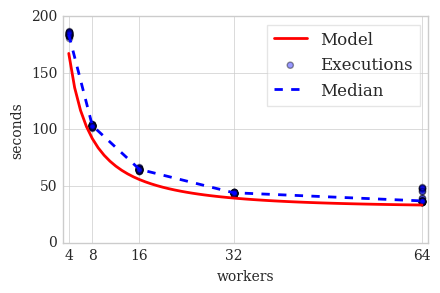

Prediction of the Wikipedia application target execution duration.


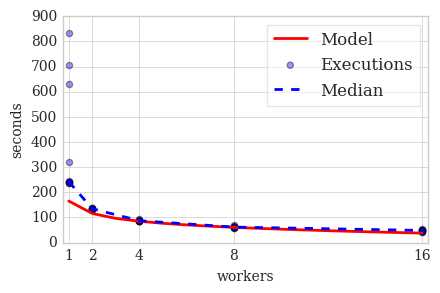

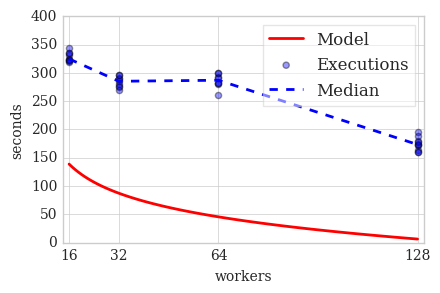

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


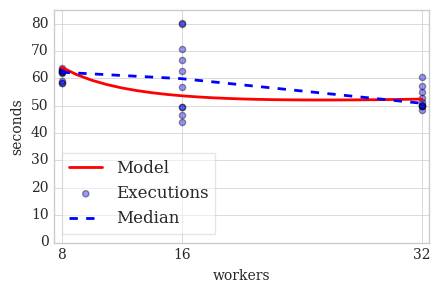

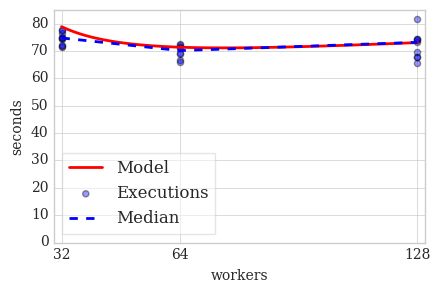

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.


**Model number 1292**

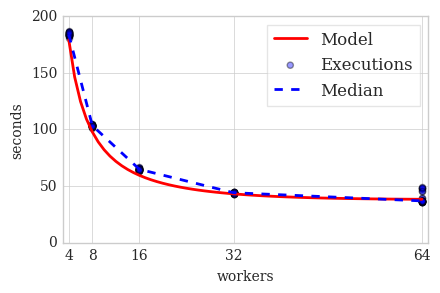

Prediction of the Wikipedia application target execution duration.


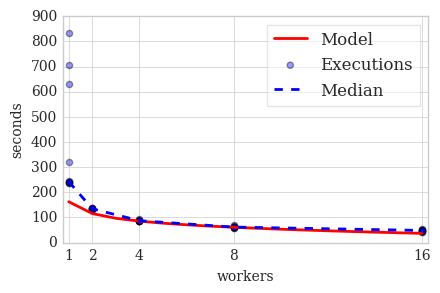

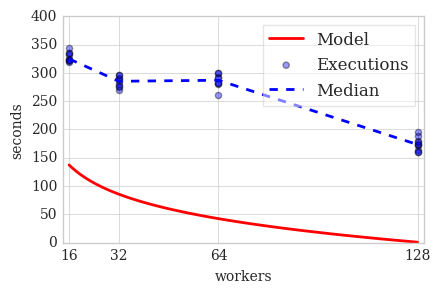

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


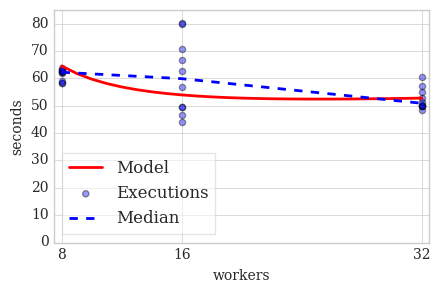

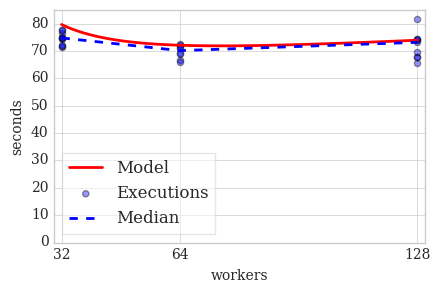

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.


**Model number 5126**

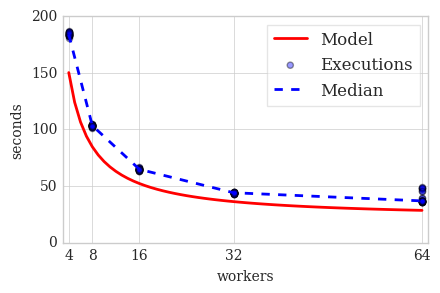

Prediction of the Wikipedia application target execution duration.


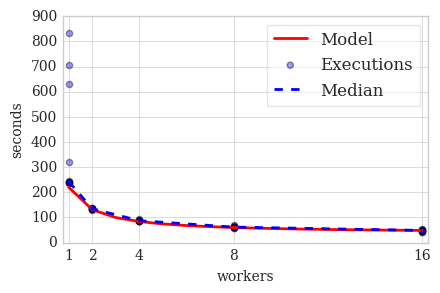

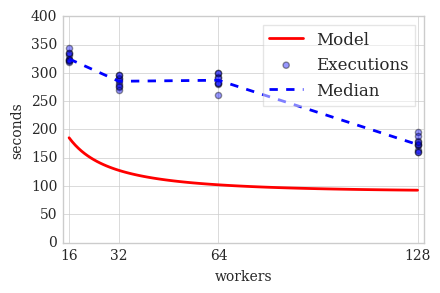

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


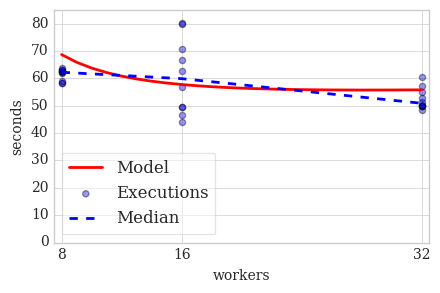

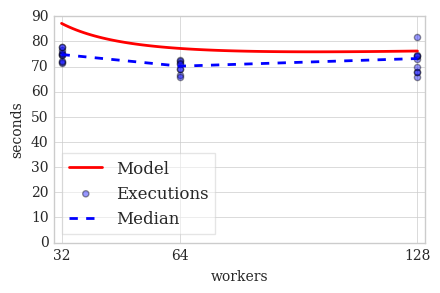

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.


**Model number 761**

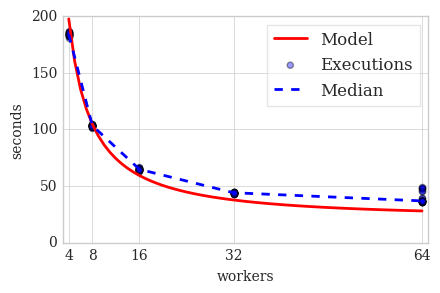

Prediction of the Wikipedia application target execution duration.


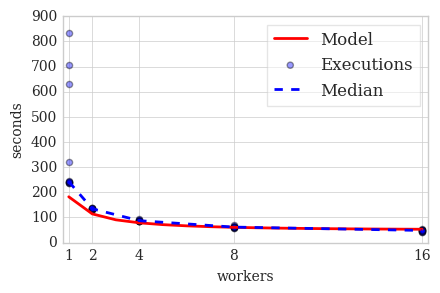

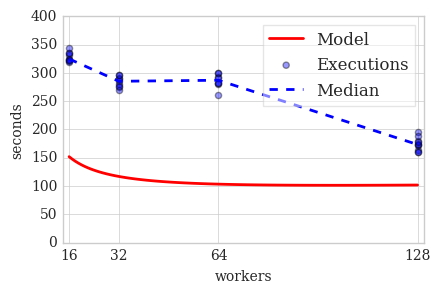

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


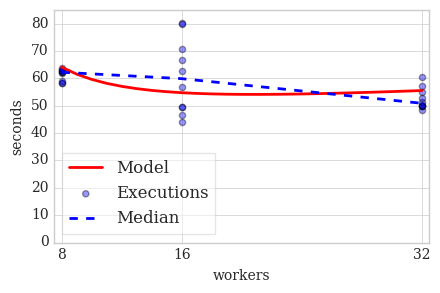

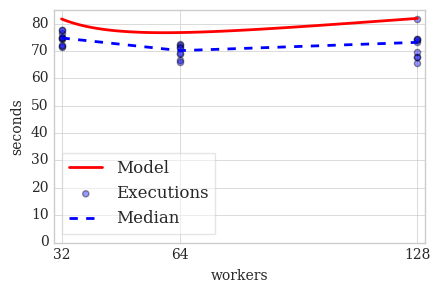

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.


**Model number 5115**

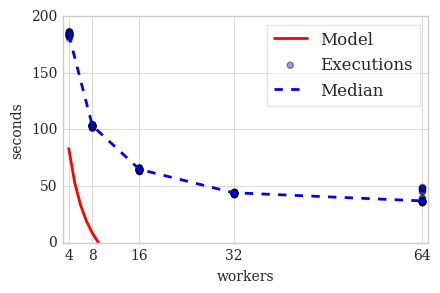

Prediction of the Wikipedia application target execution duration.


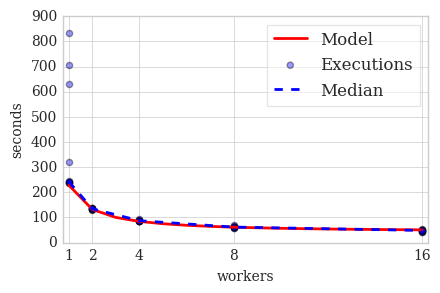

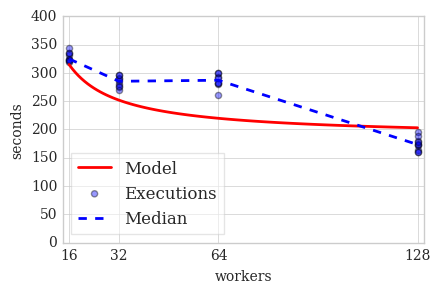

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


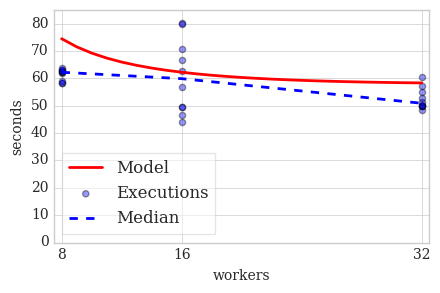

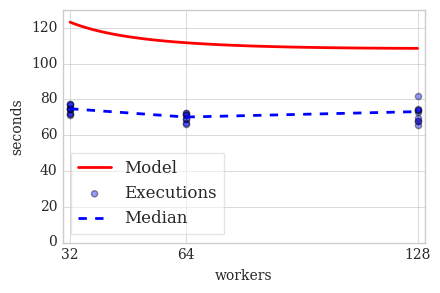

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.


In [22]:
for model in to_compare:
    display(Markdown('**Model number {}**'.format(model.number)))
    plot_model(model)

## Profiling best

In [23]:
select_best(cmp_df, model_info, 'profiling')

Best in "MAPE rank": 817284
Best in "RMSE rank": 922372
Best in "rank sum": 922911
Best in "MAPE mean": 967575
Best in "RMSE mean": 1047718
Best in "MAPE max": 338450
Best in "RMSE max": 822252


[(338450, 1),
 (922372, 1),
 (1047718, 1),
 (967575, 1),
 (817284, 1),
 (822252, 1),
 (922911, 1)]

In [24]:
model_info(1047718);

      model number: 1047718
      linear model: LinReg
      duration log: False
            params: 
number of features: 17
          features: (1/workers)^2, (log(input))^2, (log(workers))^2, (workers)^2, 1/workers, 1/workers * input, 1/workers * log(input), input, input * log(input), input * log(workers), input * workers, log(input) * log(workers), log(input) * workers, log(input/workers), log(workers), log(workers) * workers, workers


MAPE      MPE         RMSE  MAPE rank  \
model   set       application                                            
1047718 profiling hbkmeans       0.03    -0.00      1050.41      13881   
                  hbsort         0.07    -0.02      9192.60      22355   
                  wikipedia      0.04    -0.00      1195.81      94791   
        target    hbkmeans    3560.04 -3559.93 558535198.54    2095033   
                  hbsort      2258.00  2258.00 987901721.03    2083477   
                  wikipedia   1141.69  1141.69  72481079.44    1749091   

                               RMSE rank  rank sum  
model   set       application                       
1047718 profiling hbkmeans             5     13886  
                  hbsort            5615     27970  
                  wikipedia       267694    362485  
        target    hbkmeans       2094894   4189927  
                  hbsort         2083311   4166788  
                  wikipedia      1750565   3499656

MAPE rank  RMSE rank  rank sum  MAPE mean    RMSE mean  \
model   set                                                                 
1047718 profiling     131027     273314    404341       0.04      3812.94   
        target       5927601    5928770  11856371    2319.91 539639333.00   

                   MAPE max     RMSE max  
model   set                               
1047718 profiling      0.07      9192.60  
        target      3560.04 987901721.03

## Log models

In [25]:
log_models = [m for m in get_model_creator().get_models(0, 1) if m.is_log]

In [26]:
model_nrs = [m.number for m in log_models]
cmp_df.loc[cmp_df.index.get_level_values('model').isin(model_nrs)].sort_values('rank sum')

MAPE rank  RMSE rank  rank sum  MAPE mean  RMSE mean  \
set       model                                                           
target    1048575      33892      50267     84159       0.32   78794.82   
          2097153      36299      52234     88533       0.33   79500.71   
          1048577      42136      47870     90006       0.35   76752.57   
          2097155      42342      48703     91045       0.35   77484.26   
          1048576      77805      77912    155717       0.65  113274.72   
          2097154      78272      78190    156462       0.65  113303.61   
profiling 1048577    4148192    5969763  10117955       0.09    6398.24   
          2097155    4149763    5987241  10137004       0.09    6415.70   
          1048575    6171278    6244531  12415809       0.16    9097.79   
          2097153    6171204    6244966  12416170       0.16    9111.23   
          2097154    6290246    6291458  12581704       0.24   12081.08   
          1048576    6290251    6291457  12581708       0.24   12077.07   

                   MAPE max  RMSE max  
set       model                        
target    1048575      0.42 149755.11  
          2097153      0.44 150451.31  
          1048577      0.55 144016.03  
          2097155      0.55 145629.72  
          1048576      0.70 214706.48  
          2097154      0.70 214346.86  
profiling 1048577      0.10  13066.85  
          2097155      0.10  13086.83  
          1048575      0.28  19816.36  
          2097153      0.28  19824.85  
          2097154      0.37  23899.29  
          1048576      0.37  23882.27

      model number: 262145
      linear model: LinReg
      duration log: False
            params: 
number of features: 8
          features: (1/workers)^2, (input)^2, (log(input))^2, (log(workers))^2, (workers)^2, 1/workers * input, input * log(input), log(input) * workers


MAPE     MPE        RMSE  MAPE rank  RMSE rank  \
model  set       application                                                    
262145 profiling hbkmeans      0.04   -0.00     1267.59     599890     578399   
                 hbsort        0.14   -0.04    12625.45    1045857    1830315   
                 wikipedia     0.04   -0.00     1286.18    1658463    1601248   
       target    hbkmeans     16.22   16.22  1638145.15    1301080    1245960   
                 hbsort       21.95   21.95  8187850.71    1310987    1310223   
                 wikipedia   170.91 -170.91 10769132.52    1359463    1357246   

                              rank sum  
model  set       application            
262145 profiling hbkmeans      1178289  
                 hbsort        2876172  
                 wikipedia     3259711  
       target    hbkmeans      2547040  
                 hbsort        2621210  
                 wikipedia     2716709

MAPE rank  RMSE rank  rank sum  MAPE mean  RMSE mean  \
model  set                                                               
262145 profiling    3304210    4009962   7314172       0.07    5059.74   
       target       3971530    3913429   7884959      69.69 6865042.79   

                  MAPE max    RMSE max  
model  set                              
262145 profiling      0.14    12625.45  
       target       170.91 10769132.52

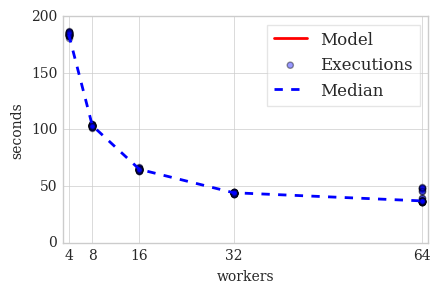

Prediction of the Wikipedia application target execution duration.


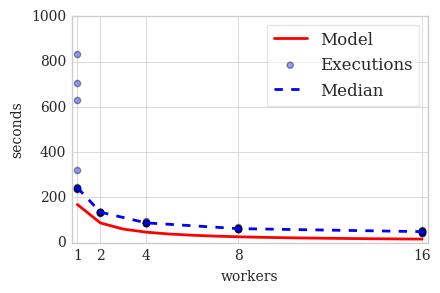

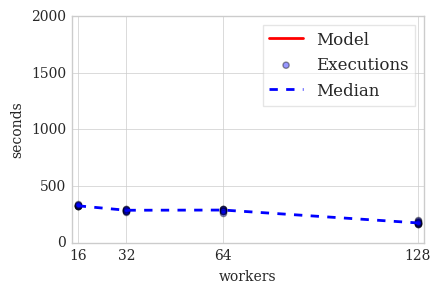

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


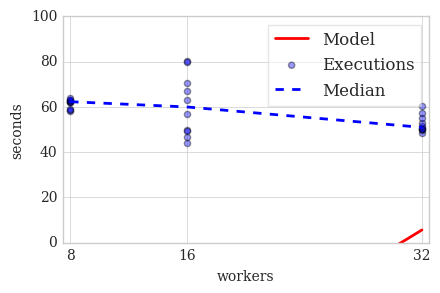

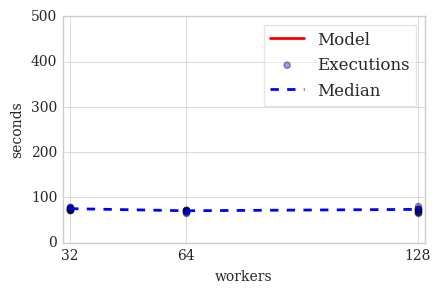

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.


In [27]:
model = model_info(262145)
plot_model(model)

In [28]:
model = get_model(5126)
model_df = get_model_df(model)

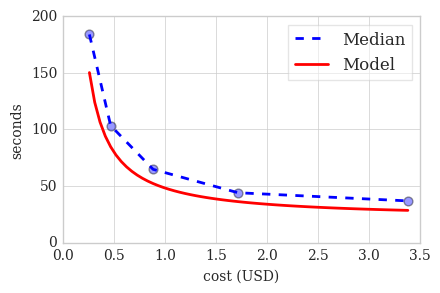

Prediction of the Wikipedia application cost.


In [32]:
def aws_cost(seconds):
    # t2.medium
    return np.ceil(seconds / 3600) * 0.052

plot_wikipedia_cost(model, model_df, aws_cost, True)

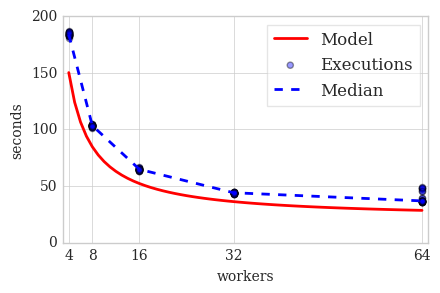

Prediction of the Wikipedia application target execution duration.


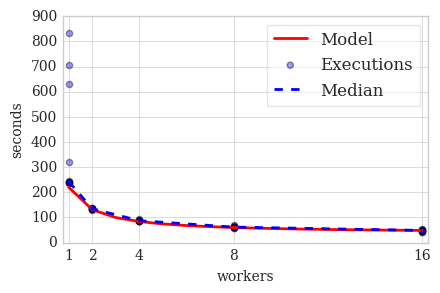

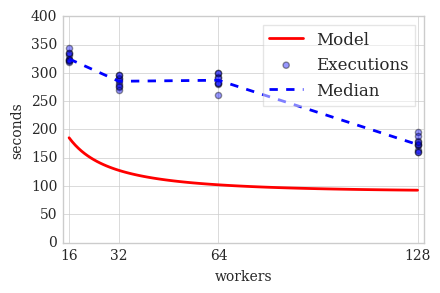

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


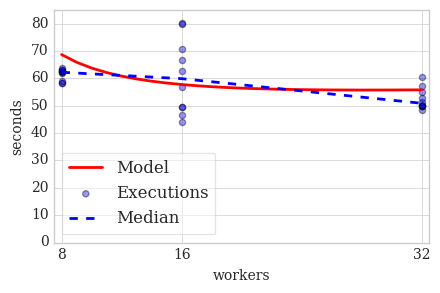

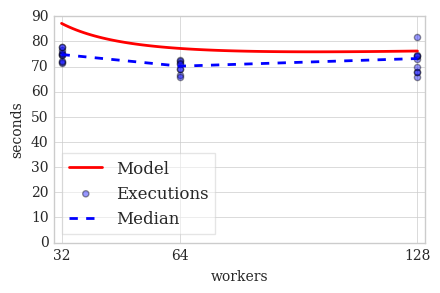

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.


In [31]:
plot_model(5126, True)